In [2]:
import numpy as np
import matplotlib.pyplot as plt
from gaussian_elimination import *

In [3]:
def f(xl:np.array,yl:np.array)->float:
    if len(xl)!=len(yl):
        raise ValueError("The length of the x and y arrays must be the same")
    if len(xl)<=1:
        return yl[0]
    else:
        return (f(xl[1::],yl[1::])-f(xl[0:-1:],yl[0:-1:]))/(xl[-1]-xl[0])
    
def NewtonCoefficients(xl:np.array,yl:np.array)->np.array:
    return [f(xl[0:n],yl[0:n]) for n in range(1,len(xl)+1)]

def interpolatefunc(x:np.array,xl:np.array,cl:np.array)->np.array:
    y=np.zeros(x.shape)
    for i in range(len(cl)):
        y=y+cl[i]*np.prod([x-xi for xi in xl[:i]],axis=0)
    return y

def splines_funciton(x:float,xl:np.array,yl:np.array)->np.array:
    n=len(xl)
    A=np.zeros((n-2,n-2))
    B=np.zeros(n-2)
    for i in range(1,n-1):
        A[i-1,i-1]=2*(xl[i+1]-xl[i-1])
        if i<n-2:
            A[i-1,i]=xl[i+1]-xl[i]
        if i>1:
            A[i-1,i-2]=xl[i]-xl[i-1]
        if i>1 and i<n-2:
            B[i-1]=6*(yl[i+1]-yl[i])/(xl[i+1]-xl[i])+6*(yl[i-1]-yl[i])/(xl[i]-xl[i-1])

    B[0]=6*(yl[2]-yl[1])/(xl[2]-xl[1])+6*(yl[0]-yl[1])/(xl[1]-xl[0])
    B[-1]=6*(yl[n-1]-yl[n-2])/(xl[n-1]-xl[n-2])+6*(yl[n-3]-yl[n-2])/(xl[n-2]-xl[n-3])
    M=np.hstack([A,B.reshape(-1, 1)])
    M0,c,flag=gaussian_elimination(M)
    cl=np.hstack([0,c,0])
    for i in range(1,n):
        if xl[i-1]<=x and x<=xl[i]:
            print(i)
            return cl[i-1]*(xl[i]-x)**3/(6*(xl[i]-xl[i-1]))+cl[i]*(x-xl[i-1])**3/(6*(xl[i]-xl[i-1]))+(yl[i-1]/(xl[i]-xl[i-1])-cl[i-1]*(xl[i]-xl[i-1])/6)*(xl[i]-x)+(yl[i]/(xl[i]-xl[i-1])-cl[i]*(xl[i]-xl[i-1])/6)*(x-xl[i-1])

1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
9
9


Text(0.5, 1.0, 'Interpolating for cos(x)')

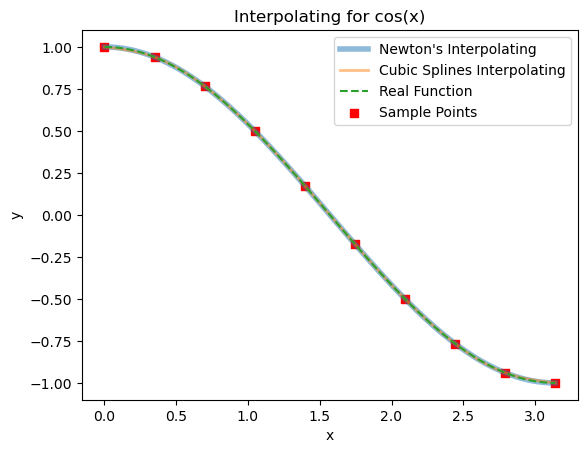

In [4]:
xl=np.linspace(0,np.pi,10)
yl=np.cos(xl)
cl=NewtonCoefficients(xl,yl)
xx=np.linspace(0,np.pi,100)
xn=np.array([xx**n for n in range(len(xl))])
yspl=[splines_funciton(x,xl,yl) for x in xx]
plt.plot(xx,interpolatefunc(xx,xl,cl),linewidth=4,alpha=0.5)
plt.plot(xx,yspl,linewidth=2,alpha=0.5)
plt.plot(xx,np.cos(xx),linestyle="--")
plt.scatter(xl,yl,marker="s",color="red")
plt.legend(["Newton's Interpolating","Cubic Splines Interpolating","Real Function","Sample Points"])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolating for cos(x)")

Text(0.5, 1.0, 'Interpolating for 1/(1+25x^2)')

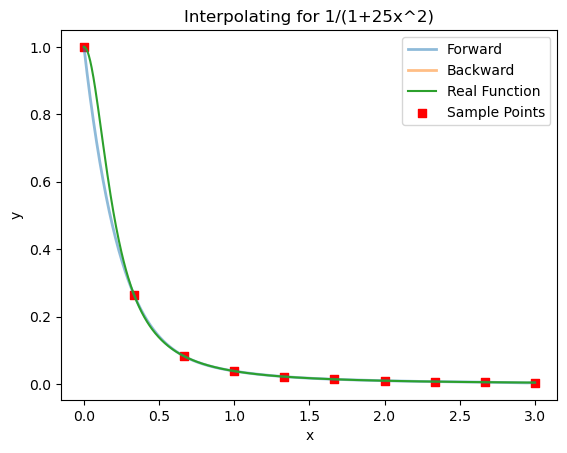

In [11]:
xl=np.linspace(0,3,10)
yl=1/(1+25*xl**2)
xl=xl[::-1]
yl=yl[::-1]
cl=NewtonCoefficients(xl,yl)
xx=np.linspace(0,3,1000)
xn=np.array([xx**n for n in range(len(xl))  ])
plt.plot(xx,interpolatefunc(xx,xl,cl),linewidth=2,alpha=0.5)
yspl=[splines_funciton(x,xl,yl) for x in xx]
plt.plot(xx,yspl,linewidth=2,alpha=0.5)
plt.plot(xx,1/(1+25*xx**2))
plt.scatter(xl,yl,marker="s",color="red")
plt.legend(["Forward","Backward","Real Function","Sample Points"])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolating for 1/(1+25x^2)")

Text(0.5, 1.0, 'Interpolating for 1/(1+25x^2)')

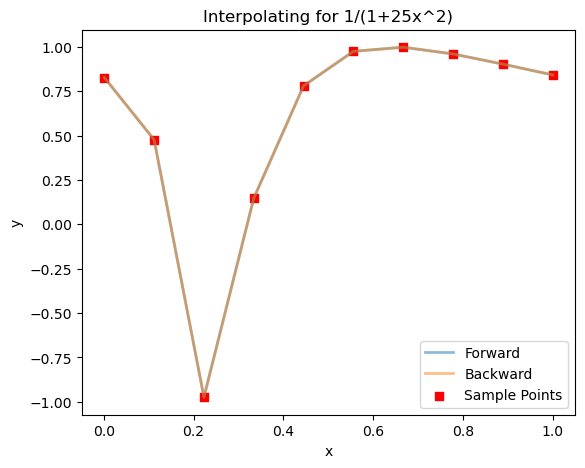

In [29]:
xl=np.linspace(0.001,1,10)
yl=np.sin(1/xl)
xl1=xl[::-1]
yl1=yl[::-1]
cl=NewtonCoefficients(xl,yl)
cl1=NewtonCoefficients(xl1,yl1)
xx=np.linspace(0.001,1,10)
xn=np.array([xx**n for n in range(len(xl))])
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(xx,interpolatefunc(xx,xl,cl),linewidth=2,alpha=0.5)
plt.plot(xx,interpolatefunc(xx,xl1,cl1),linewidth=2,alpha=0.5)
plt.scatter(xl,yl,marker="s",color="red")
plt.legend(["Forward","Backward","Sample Points"])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolating for 1/(1+25x^2)")


In [30]:
interpolatefunc(np.array([0]),xl,cl)

array([0.70154596])

In [31]:
print(interpolatefunc(np.array([0]),xl1,cl1))

[0.70154596]


In [138]:
# xl=np.array([3.0,4.5,7.0,9.0])
# yl=np.array([2.5,1.0,2.5,0.5])


In [140]:
A

array([[0.88888889, 0.22222222, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.22222222, 0.88888889, 0.22222222, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.22222222, 0.88888889, 0.22222222, 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.22222222, 0.88888889, 0.22222222,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.22222222, 0.88888889,
        0.22222222, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.22222222,
        0.88888889, 0.22222222, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.22222222, 0.88888889, 0.22222222],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.22222222, 0.88888889]])

In [142]:
cl

array([  0.        ,   1.13172288,  -0.98522269,  14.6269341 ,
       -15.0619018 , -15.0619018 ,  14.6269341 ,  -0.98522269,
         1.13172288,   0.        ])

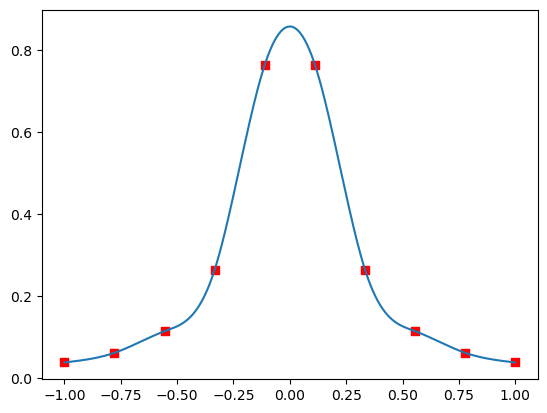

In [143]:
y=[splines_funciton(xi,xl,yl,cl) for xi in xx]
plt.plot(xx,y)
plt.scatter(xl,yl,marker="s",color="red")